# 线性回归的简介实现

> 通过使用深度学习框架来简洁实现 线性回归模型 生成数据集

In [262]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils import data
from d2l import torch as d2l

In [263]:
true_w = torch.tensor([2., -3.5])
true_w = torch.tensor([[2.,]])
true_b = 3.1

features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [264]:
features.min(), features.max()

(tensor(-3.2883), tensor(4.1941))

In [265]:
features = torch.randn(size=(1000, 1)) # 生成原始的特征
# features, _ = features.sort(dim=0)
labels = features@true_w + true_b

features.min(), features.max()

(tensor(-3.1573), tensor(3.0553))

In [266]:
features.shape, labels.shape

(torch.Size([1000, 1]), torch.Size([1000, 1]))

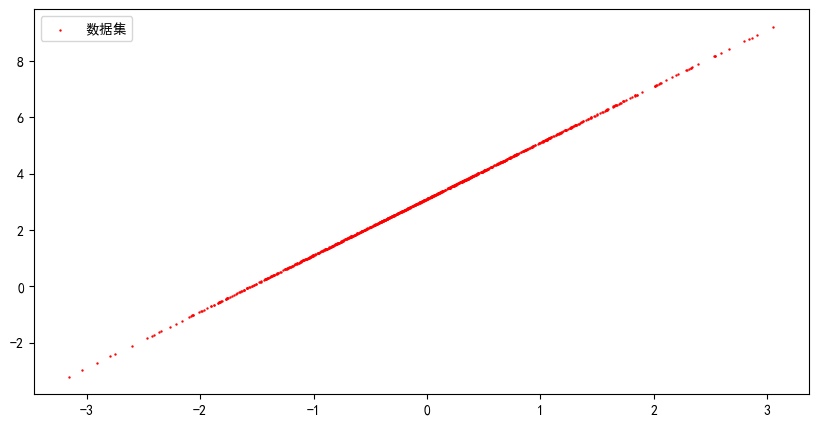

In [267]:
plt.figure(figsize=(10, 5))
# plt.title("")
plt.scatter(features, labels, s=0.5, c='r', label='数据集')
plt.legend()
plt.show()

### 调用框架现有的API读取数据

In [268]:
def load_array(data_arrays, batch_size, is_train=True):
    """构造一个PyTorch的数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train) 

In [269]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [270]:
next(iter(data_iter))

[tensor([[ 1.4963],
         [-0.9636],
         [ 0.6570],
         [ 0.5080],
         [-0.1662],
         [-2.0960],
         [ 1.8914],
         [ 0.0130],
         [-0.3272],
         [ 0.5862]]),
 tensor([[ 6.0926],
         [ 1.1728],
         [ 4.4141],
         [ 4.1160],
         [ 2.7677],
         [-1.0920],
         [ 6.8829],
         [ 3.1260],
         [ 2.4456],
         [ 4.2723]])]

### 使用框架预定义好的层

In [271]:
from torch import nn

In [272]:
net = nn.Sequential(nn.Linear(features.shape[-1], 1))

### 初始化模型参数 

In [273]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

### 计算均方误差使用 MSELoss类， 也称L2范数

In [274]:
loss = nn.MSELoss()

### 实例化SGD实例

In [275]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

### 训练

In [276]:
num_epochs = 3

for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()  # 参数更新
    l = loss(net(features), labels)
    print(f"epoch {epoch + 1}, loss {l:f}")

epoch 1, loss 0.000088
epoch 2, loss 0.000000
epoch 3, loss 0.000000


In [277]:
state_dict = net.state_dict()

In [278]:
w = float(state_dict['0.weight'])
b = float(state_dict['0.bias'])

x = np.linspace(features.min(), features.max(), 1000)
y = x * w + b

In [279]:
w, b

(1.999999761581421, 3.099998712539673)

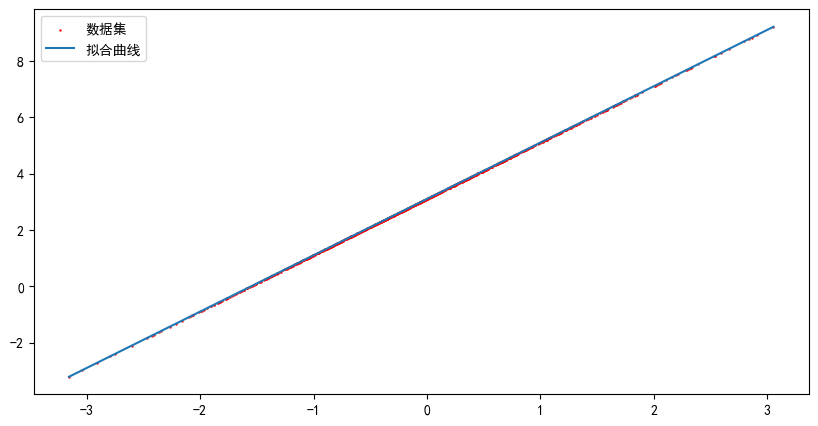

In [280]:
plt.figure(figsize=(10, 5))
plt.scatter(features, labels, s=0.5, c='r', label='数据集')
plt.plot(x, y, label='拟合曲线')
plt.legend()
plt.show()